In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
%matplotlib inline


In [117]:
vel_means = []
angular_vels = []
identification = []
freqs = []

data_path='../data'
lv0 = data_path
lv1s = os.listdir(lv0)
if '.ipynb_checkpoints' in lv1s:
        lv1s.remove('.ipynb_checkpoints')

for lv1 in lv1s:
    lv2s = os.listdir('/'.join([lv0, lv1]))
    #asf collecting
    path = '%s/%s/data.csv' % (lv0, lv1)
    print(path)
    data = pd.read_csv(path)
    df = data.drop(['Unnamed: 0'], axis=1)
    values = set(df['amc_path'].values) # for one person there may be several records
    for item in values:
        onecasedf = df.loc[df['amc_path'] == df['amc_path'].loc[0]]
        #calculate the hip velocity
        vels = np.zeros(onecasedf.shape[0] - 25)
        angular_vel = np.zeros(onecasedf.shape[0] - 25)
    #     print(onecasedf['ltibia_norm_angle_0'].max(), onecasedf['ltibia_norm_angle_0'].min())
    #     amps = np.zeros(onecasedf.shape[0] - 5)
        maxval = onecasedf['ltibia_norm_angle_0'].max()
        print(maxval)
        peaks = []
        for i in range(onecasedf.shape[0] - 25):
            #calculate hip velocity and joint amplitude
            vels[i] = abs(onecasedf['root_coord_2'].loc[i+25] - onecasedf['root_coord_2'].loc[i]) / 0.45 * 2.54 / 24 # santimeters per sec
            angular_vel[i] = abs(onecasedf['ltibia_norm_angle_0'].loc[i+25] - onecasedf['ltibia_norm_angle_0'].loc[i]) / 24 # santimeters per sec
            if onecasedf['ltibia_norm_angle_0'].loc[i] >= maxval - 0.05 and onecasedf['ltibia_norm_angle_0'].loc[i+25] < onecasedf['ltibia_norm_angle_0'].loc[i]:
                peaks.append(onecasedf['frame'].loc[i])
        cl_peaks = []
        for i, ix in enumerate(peaks):
            if i == 0:
                cl_peaks.append(ix)
            elif abs(ix - peaks[i-1]) > 25:
                cl_peaks.append(ix)
        print(cl_peaks)
        if len(cl_peaks) > 1:
            diff = cl_peaks[len(cl_peaks)-1] - cl_peaks[len(cl_peaks)-2]
            pereod = 120/diff
            freq = 1/pereod
            angular_vels.append(angular_vel.mean())
            freqs.append(freq)
            vel_means.append(vels.mean())
            identification.append(item)

../data/02/data.csv
1.0908943166576035
[94, 224]
1.0908943166576035
[94, 224]
../data/05/data.csv
0.7759682416950784
[61, 204]
../data/06/data.csv
0.9862245876055415
[52, 193, 339]
../data/07/data.csv
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
0.9429691514578108
[271]
../data/08/data.csv
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
0.9490992516346484
[38, 157]
../data/10/data.csv
0.8999076998696923
[160, 296]
../data/16/data.csv
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.9132524682100204
[79, 218, 358]
0.913252468210

vel_means = []
freq_means = []
identification = []

data_path='../data'
lv0 = data_path
lv1s = os.listdir(lv0)
if '.ipynb_checkpoints' in lv1s:
        lv1s.remove('.ipynb_checkpoints')

for lv1 in lv1s:
    lv2s = os.listdir('/'.join([lv0, lv1]))
    #asf collecting
    path = '%s/%s/data.csv' % (lv0, lv1)
    print(path)
#####     df = amc_parser.get_all_data(person_folder=asf_folder)
    data = pd.read_csv(path)
    df = data.drop(['Unnamed: 0'], axis=1)
    values = set(df['amc_path'].values) # for one person there may be several records
    for item in values:
        onecasedf = df.loc[df['amc_path'] == df['amc_path'].loc[0]]
        
        #calculate the hip velocity
        amps = np.zeros(onecasedf.shape[0] - 5)
        vels = np.zeros(onecasedf.shape[0] - 5)
        for i in range(onecasedf.shape[0] - 5):
            #calculate hip velocity and joint amplitude
            vels[i] = abs(onecasedf['root_coord_2'].loc[i+5] - onecasedf['root_coord_2'].loc[i]) / 0.45 * 2.54 / 24 # santimeters per sec
            amps[i] = abs(onecasedf['ltibia_norm_angle_0'].loc[i+5] - onecasedf['ltibia_norm_angle_0'].loc[i]) / 24 # santimeters per sec
        amp_means.append(amps.mean())
        vel_means.append(vels.mean())
        identification.append(item)

In [118]:
result_data_dict = {'sample_unic_id': identification, 'velocity': vel_means, 'angular_vels': angular_vels, 'frequency':freqs}
res_df = pd.DataFrame(data=result_data_dict)
res_df

,sample_unic_id,velocity,angular_vels,frequency
0,02_02.amc,1.016481,0.013147,1.083333
1,02_01.amc,1.016481,0.013147,1.083333
2,05_01.amc,0.815678,0.012362,1.191667
3,06_01.amc,0.906153,0.013088,1.216667
4,08_02.amc,1.387567,0.018620,0.991667
5,08_04.amc,1.387567,0.018620,0.991667
6,08_03.amc,1.387567,0.018620,0.991667
7,08_09.amc,1.387567,0.018620,0.991667
8,08_10.amc,1.387567,0.018620,0.991667
9,08_06.amc,1.387567,0.018620,0.991667


### Not much data but will try detect correlation

In [119]:
from matplotlib.colors import ListedColormap
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\xmlpro100\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'diff']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<AxesSubplot:xlabel='velocity', ylabel='frequency'>

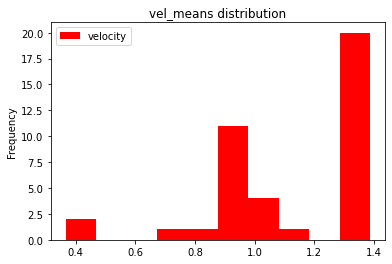

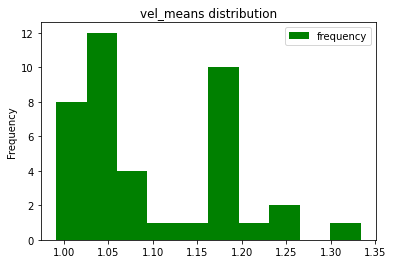

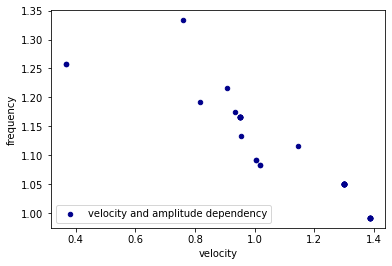

In [122]:
# the data analysis firstly.....

res_df.plot(y='velocity', kind='hist', 
           color='red',  title='vel_means distribution')
res_df.plot(y='frequency', kind='hist', 
           color='green',  title='vel_means distribution')

res_df.plot(kind='scatter', x='velocity',y='frequency',c='DarkBlue', label='velocity and amplitude dependency')
# res_df.plot(kind='line', x='velocity',y='frequency',c='DarkBlue', label='velocity and amplitude dependency')

In [124]:
res_df = res_df.sort_values(by=['velocity'])
res_df = res_df.sample(frac = 1)
X = res_df[['velocity']].to_numpy()
X = X.reshape(X.shape[0],1)
y = res_df[['frequency']].to_numpy()

In [125]:
X.shape

(40, 1)

In [126]:
## Try linear model like y = aX + b

In [127]:
def fit(X, y):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

def predict(X, w):
    n, k = X.shape
    X = np.hstack((X, np.ones((n, 1))))
    y_pred = X @ w
    return y_pred

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
weights = fit(X_train, y_train)
weights

array([[-0.31803181],
       [ 1.45313162]])

In [128]:
y_hat = predict(X_test, weights)
# y_hat = y_hat.sort()
print(y_hat)

[[1.01184105]
 [1.16494607]
 [1.04023112]
 [1.04023112]
 [1.01184105]
 [1.04023112]
 [1.15088543]
 [1.01184105]
 [1.19372016]
 [1.04023112]
 [1.33662252]
 [1.14937111]]


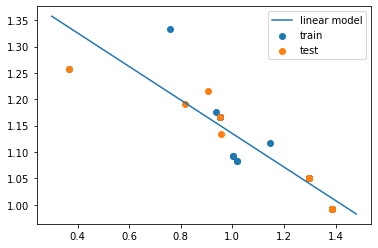

In [132]:
#Plot line
x_line = np.arange(0.3, 1.5, 0.02)
y_line = weights[0][0] * x_line + weights[1][0]

plt.plot(x_line, y_line, label = 'linear model')
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.legend()
plt.show()

In [133]:
print(r2_score(y_test, y_hat))
print(mean_squared_error(y_test, y_hat))

0.8880993942792598
0.0009097860300183062


### Try scalling + regularization

In [134]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#### MinMaxScaler

In [135]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [136]:
weights = fit(X_train, y_train)
weights

array([[-0.32478147],
       [ 1.33662252]])

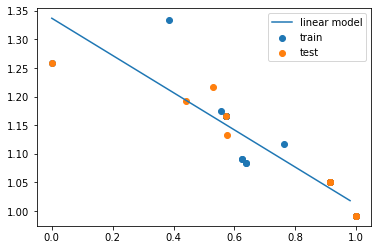

In [139]:
#Plot line
x_line = np.arange(0, 1.0, 0.02)
y_line = weights[0][0] * x_line + weights[1][0]

plt.plot(x_line, y_line, label = 'linear model')
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.legend()
plt.show()

In [140]:
print(r2_score(y_test, y_hat))
print(mean_squared_error(y_test, y_hat))

0.8880993942792598
0.0009097860300183062


#### StandardScaler

In [141]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.0009097860300183229
r2 score:  0.8880993942792577


In [142]:
weights = fit(X_train, y_train)
weights

array([[-0.07589825],
       [ 1.0985119 ]])

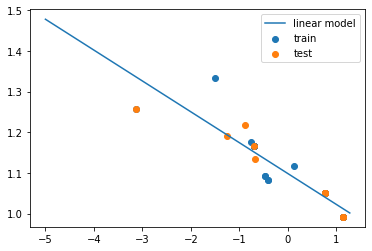

In [143]:
#Plot line
x_line = np.arange(-5, 1.3, 0.02)
y_line = weights[0][0] * x_line + weights[1][0]

plt.plot(x_line, y_line, label = 'linear model')
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.legend()
plt.show()

In [144]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.0009097860300183229
r2 score:  0.8880993942792577


In [145]:
regressor.coef_

array([[-0.07589825]])

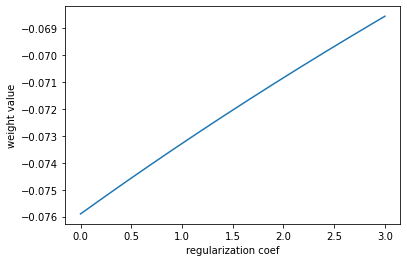

In [154]:
alphas = np.linspace(0, 3, 1000)

weights = np.empty((X.shape[1], 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.show()

In [155]:
ridge = Ridge(0.1)
ridge.fit(X_train, y_train)
print('\n r2 score ridge: ', r2_score(y_test, ridge.predict(X_test)))
print('test mse ridge: ', mean_squared_error(y_test, ridge.predict(X_test)))


 r2 score ridge:  0.8889911025989166
test mse ridge:  0.0009025361696011115


\textbf{We can try also the cross validation becouse the sample is very small}

### Suppose there are outliers in data

In [157]:
res_df = res_df.sort_values(by=['velocity'])
X = res_df[['velocity']].to_numpy()
X = X.reshape(X.shape[0],1)
y = res_df[['frequency']].to_numpy()

In [163]:
i_todel = []
for i in range(X.shape[0]):
#     print(X[i])
#     print(y[i])
    #threshold has been selected by data inspection
    if X[i][0] < 0.5:
        i_todel.append(i)

X_new = np.delete(X, i_todel)
X_new = X_new.reshape(X_new.shape[0], 1)
y_new = np.delete(y, i_todel)
y_new = y_new.reshape(y_new.shape[0], 1)

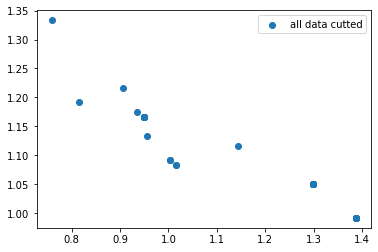

In [164]:
plt.scatter(X_new, y_new, label ='all data cutted')
plt.legend()
plt.show()

We have deleted around 3% of data

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=2)

In [166]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [167]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))

test mse:  0.001527135700496324
r2 score:  0.819706866969416


In [168]:
regressor.coef_

array([[-0.06960948]])

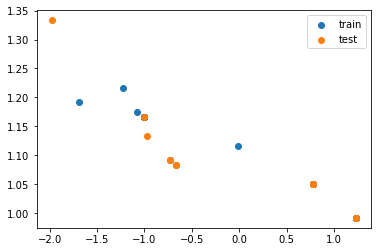

In [169]:
plt.scatter(X_train, y_train, label ='train')
plt.scatter(X_test, y_test, label ='test')
plt.legend()
plt.show()

Try to polynomial model through the features extension

In [172]:
new_df = res_df.copy()
new_df['vel_sq'] = new_df.velocity.apply(lambda x : x**2)
new_df.head(10)

,sample_unic_id,velocity,angular_vels,frequency,vel_sq
22,32_02.amc,0.366344,0.008124,1.258333,0.134208
21,32_01.amc,0.366344,0.008124,1.258333,0.134208
38,49_01.amc,0.759248,0.013325,1.333333,0.576457
2,05_01.amc,0.815678,0.012362,1.191667,0.665330
3,06_01.amc,0.906153,0.013088,1.216667,0.821114
39,55_04.amc,0.935304,0.015817,1.175000,0.874793
15,16_15.amc,0.950365,0.013546,1.166667,0.903193
18,16_58.amc,0.950365,0.013546,1.166667,0.903193
13,16_32.amc,0.950365,0.013546,1.166667,0.903193
16,16_31.amc,0.950365,0.013546,1.166667,0.903193


In [173]:
y = new_df[['frequency']].to_numpy()
X = new_df[['velocity', 'vel_sq']].to_numpy()
X = X.reshape(X.shape[0],2)

In [174]:
i_todel = []
for i in range(X.shape[0]):
#     print(X[i])
#     print(y[i])
    if y[i] < 0.003:
        i_todel.append(i)
X_new = np.delete(X, i_todel, 0)
X_new = X_new.reshape(X_new.shape[0], 2)
y_new = np.delete(y, i_todel)
y_new = y_new.reshape(y_new.shape[0], 1)

In [175]:
scaler = StandardScaler()

X = scaler.fit_transform(X_new)

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=2)

In [177]:
regressor = LinearRegression()

regressor.fit(X_train, y_train)
test_predictions = regressor.predict(X_test)

print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
regressor.coef_

test mse:  0.0017479090272867483
r2 score:  0.8412550736255342


array([[ 0.06183637, -0.17868592]])

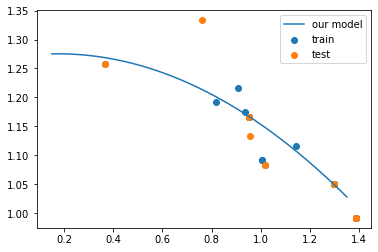

In [183]:
#Plot polinomial
x_line = np.arange(0.15, 1.35, 0.02)
y_line = regressor.coef_[0][0] * x_line + regressor.coef_[0][1]* x_line**2 + 1.27

plt.plot(x_line, y_line, label = 'our model')
plt.scatter(X_train[:,0], y_train, label ='train')
plt.scatter(X_test[:,0], y_test, label ='test')
plt.legend()
plt.show()

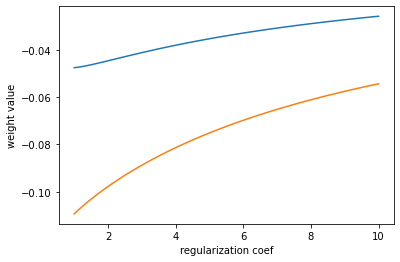

In [184]:
alphas = np.linspace(1, 10, 100)

weights = np.empty((X.shape[1], 0))
for alpha in alphas:
    ridge_regressor = Ridge(alpha)
    ridge_regressor.fit(X_train, y_train)
    weights = np.hstack((weights, ridge_regressor.coef_.reshape(-1, 1)))
plt.plot(alphas, weights.T)
plt.xlabel('regularization coef')
plt.ylabel('weight value')
plt.show()

In [185]:
ridge_regressor = Ridge(0.1)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=0.1)

In [186]:
test_predictions = ridge_regressor.predict(X_test)
print('test mse: ', mean_squared_error(y_test, test_predictions))
print('r2 score: ', r2_score(y_test, test_predictions))
regressor.coef_

test mse:  0.0017771455944602759
r2 score:  0.8385998114631732


array([[ 0.06183637, -0.17868592]])

It was a bad idea to try ridge regularization...

Try crossvalidation on simple linear model

In [189]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(regressor, X_train, y_train, scoring='r2', cv=3)
scores 

array([0.79724344, 0.92423397, 0.751884  ])

The best one is the linear model with scores 0.729 after cleaning thew data (We deleted around 3% of data as bad example)

